## HENRY PI1
### Reporte

In [1]:
# Detectar modulos locales
import sys
sys.path.append('../')

**Nota**:\
    Voy a dejar el link de github para cada funcion que cree para resolver los ejercicos\
\
**Recomendacion**:\
    Para entender que hace cada funcion o clase, me tome el trabajo de documentalas todas**
    
con el siguiente metodo aplicado a las funciones se podran leer o su editor de codigo ya vendra incluido con esta caracteristica

In [2]:
from src.docs import test_docs
print(test_docs.__doc__)


    Documentacion.
    Esto es una prueba, intenta con otras funciones

    >>> func().__doc__
    


### En la realizacion del proyecto se utilizo la siguiente API
### [estadisticasbcra](https://estadisticasbcra.com/)
\
**Para llamar a esta y traerme todos los datos, cree un objeto llamado API() que interactua de forma asyncronica**\
[link del codigo](https://github.com/hackcheek/API_BCRA/blob/main/src/api.py)

In [2]:
from src.api import API
from src.dtypes import Endpoints


points: list[Endpoints] = [
    "usd",
    "usd_of",
    "var_usd_vs_usd_of",
    "inflacion_mensual_oficial",
    "var_usd_anual",
    "var_usd_of_anual",
    "milestones",
]


api = API()
test = api.jupyter_query(*points)

In [3]:
test

[[{'d': '2000-05-24', 'v': 1.0005},
  {'d': '2000-05-25', 'v': 1.0005},
  {'d': '2000-05-26', 'v': 1.0004},
  {'d': '2000-05-29', 'v': 1.0007},
  {'d': '2000-05-30', 'v': 1.0009},
  {'d': '2000-05-31', 'v': 1.001},
  {'d': '2000-06-01', 'v': 1.0007},
  {'d': '2000-06-02', 'v': 1.0011},
  {'d': '2000-06-05', 'v': 1.0011},
  {'d': '2000-06-06', 'v': 1.001},
  {'d': '2000-06-07', 'v': 1},
  {'d': '2000-06-08', 'v': 0.9998},
  {'d': '2000-06-12', 'v': 0.9998},
  {'d': '2000-06-13', 'v': 0.9996},
  {'d': '2000-06-14', 'v': 0.9999},
  {'d': '2000-06-15', 'v': 0.9988},
  {'d': '2000-06-16', 'v': 0.9988},
  {'d': '2000-06-19', 'v': 0.9988},
  {'d': '2000-06-20', 'v': 0.9994},
  {'d': '2000-06-21', 'v': 0.9996},
  {'d': '2000-06-22', 'v': 0.9991},
  {'d': '2000-06-23', 'v': 0.9985},
  {'d': '2000-06-26', 'v': 0.999},
  {'d': '2000-06-27', 'v': 0.9994},
  {'d': '2000-06-28', 'v': 0.999},
  {'d': '2000-06-29', 'v': 0.9987},
  {'d': '2000-06-30', 'v': 0.9985},
  {'d': '2000-07-03', 'v': 0.9981},
 

**Para hacer un manejo de los dataframes mas comodo hice una clase con attrdict**\
[link del codigo](https://github.com/hackcheek/API_BCRA/blob/main/src/dataclass.py)

In [4]:
from src.dataclass import Data

data = Data()
data.call_api(*points, jupyter=True)

{'usd':            date         v
 0    2000-05-24    1.0005
 1    2000-05-25    1.0005
 2    2000-05-26    1.0004
 3    2000-05-29    1.0007
 4    2000-05-30    1.0009
 ...         ...       ...
 5562 2022-07-29  296.0000
 5563 2022-08-01  282.0000
 5564 2022-08-02  291.0000
 5565 2022-08-03  298.0000
 5566 2022-08-04  291.0000
 
 [5567 rows x 2 columns],
 'usd_of':            date       v
 0    2002-03-04    2.01
 1    2002-03-05    1.99
 2    2002-03-06    2.05
 3    2002-03-07    2.14
 4    2002-03-08    2.20
 ...         ...     ...
 5011 2022-07-29  131.23
 5012 2022-08-01  131.94
 5013 2022-08-02  132.18
 5014 2022-08-03  132.41
 5015 2022-08-04  132.64
 
 [5016 rows x 2 columns],
 'var_usd_vs_usd_of':            date         v
 0    2002-03-04    5.4726
 1    2002-03-05    6.5327
 2    2002-03-06    4.3902
 3    2002-03-07    3.7383
 4    2002-03-08    3.1818
 ...         ...       ...
 5005 2022-07-29  125.5582
 5006 2022-08-01  113.7335
 5007 2022-08-02  120.1543
 5008 2022-0

In [7]:
data.usd.head(1) # Ahora puedo llamar a los dataframes de tal manera

,date,v
0,2000-05-24,1.0005


## Consignas
### a) Día con mayor variación en la brecha del ultimo año
[link del codigo](https://github.com/hackcheek/API_BCRA/blob/2aaf24edd0c0295088379e9c6fd47e822ca97dc6/src/consignas.py#L8)

In [11]:
from src.consignas import a

a(data.var_usd_vs_usd_of)

'2022-07-22'

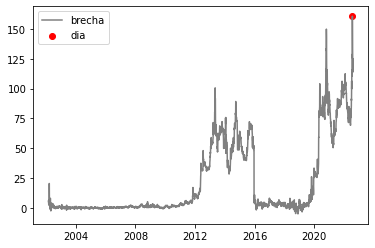

In [212]:
import matplotlib.pyplot as plt
import pandas as pd

var_data = data.var_usd_vs_usd_of.copy()
X_date = pd.to_datetime(a(var_data))

plt.plot(var_data.date, var_data.v, color='grey')
plt.scatter(X_date, var_data.loc[X_date == var_data.date, 'v'], color='red')
plt.legend(['brecha', 'dia'])
plt.savefig('../plots/dia_brecha.png')

### b) Retorna los 5 días con mayor volatilidad del ultimo año
[link del codigo](https://github.com/hackcheek/API_BCRA/blob/2aaf24edd0c0295088379e9c6fd47e822ca97dc6/src/consignas.py#L45)\
\
\
**Dolar Blue**

In [21]:
from src.consignas import b

b(data.usd, 'v')

,date,volatility
0,2022-07-04,0.084218
1,2022-07-21,0.061181
2,2022-07-08,0.060396
3,2022-07-29,0.059034
4,2022-07-20,0.051792


**Dolar Oficial**

In [22]:
b(data.usd_of, 'v')

,date,volatility
0,2022-04-18,0.006620
1,2022-06-21,0.006407
2,2022-08-01,0.005396
3,2022-07-18,0.005211
4,2022-07-25,0.004920


### c) Semana con mayor variación en la brecha del ultimo año
[link de codigo](https://github.com/hackcheek/API_BCRA/blob/2aaf24edd0c0295088379e9c6fd47e822ca97dc6/src/consignas.py#L93)

In [26]:
from src.consignas import c


max_var_week = """
Desde %s hasta %s
con una variacion de %.2f%%
""" % c(data.var_usd_vs_usd_of)

print(max_var_week)


Desde 2022-07-18 hasta 2022-07-22
con una variacion de 34.72%



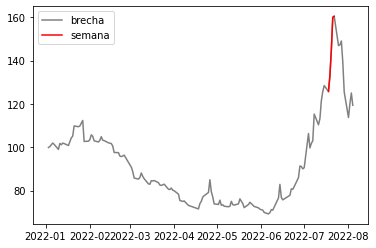

In [211]:
# Filtro por 'mayor a 2021' para visualizar mejor este pico
cut_data = data.var_usd_vs_usd_of.date.dt.year > 2021
max_week = c(data.var_usd_vs_usd_of[cut_data])

X_week = data.var_usd_vs_usd_of[cut_data].date
y_week = data.var_usd_vs_usd_of[cut_data].v

mask = (data.var_usd_vs_usd_of.date >= max_week[0]) & (data.var_usd_vs_usd_of.date <= max_week[1])

plt.plot(X_week, y_week, color='grey')
plt.plot(data.var_usd_vs_usd_of[mask].date, data.var_usd_vs_usd_of[mask].v, color='red')
plt.legend(['brecha', 'semana'])
plt.savefig('../plots/semana_brecha.png')

### d) Día de la semana donde hay mayor variación en la brecha del ultimo año
[link de codigo](https://github.com/hackcheek/API_BCRA/blob/2aaf24edd0c0295088379e9c6fd47e822ca97dc6/src/consignas.py#L135)

In [74]:
from src.consignas import d
d(data.var_usd_vs_usd_of)

,v
date,
Miercoles,93.742204
Jueves,93.615828
Viernes,92.570404
Martes,92.120416
Lunes,91.474823


### e) Con la info histórica del valor del dólar y del blue, realizar un análisis exploratorio. Cruzar la data con sucesos importantes a nivel político-económico y graficar mes a mes.
[link de codigo](https://github.com/hackcheek/API_BCRA/blob/2aaf24edd0c0295088379e9c6fd47e822ca97dc6/src/event_dolar.py#L36)

[link de grafico](https://github.com/hackcheek/API_BCRA/blob/main/plots/dolar_events.png)

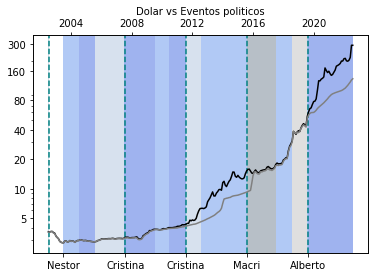

<Figure size 432x288 with 0 Axes>

In [208]:
from src.event_dolar import dolar_events_plot

dolar_events_plot(data, True)
plt.clf()

**Tuve problemas para definir el "legend" pero el grafico se explica de la siguiente manera:**

- Azul = Cambio de ministro de economia
- Celeste = Cambio de presidente del banco central
- Celeste-gris = Medidas economicas
- gris = Ministro de finanzas
- gris-claro = ministro de hacienda

- Lineas punteadas = cambio de presidente


### Observaciones

> Este analisis es objetivo, sin ideologia.


  Gracias a este grafico se puede sacar mucha data. Pero creo que la mas importante es como se comporta la brecha entre dolares en los distintos gobiernos. Por ejemplo podemos ver que los gobiernos peronistas tienden a agrandar esa brecha. Es muy impresionante ver como cuando el precio "llega" a la linea punteada de, por ejemplo, Cristina o Alberto la brecha se dispara.
  Otra observacion que no podemos dejar pasar es como al cambiar de ministros, el precio tiende a variar o estancarse. Mira, cuando asume Nestor el dolar estaba al alza, hasta que cambia el ministro de economia y retrocede bastante. Tambien podemos ver el comienzo del ciclo de alta variacion (brecha), cuando asume el ministro de economia justo antes de que asuma cristina
  
**Conclusiones**
- El evento que mas afecta al precio es el nombramiento de nuevos presidentes. Ya que no solo sube o baja, sino que hasta crece la variacion entre los dolares
- El segundo evento mas importante son los ministros de economia, logrando retrocesos e impulsos en los precios
- Podemos decir que los precios si cuentan con una correlacion con los eventos, Pero esta solo es momentaña. 


### f) Implementar una regresión lineal (una para cada tipo de dólar) para predecir el valor del dólar a 3, 6 y 12 meses:
[link de codigo](https://github.com/hackcheek/API_BCRA/blob/main/src/regression.py)

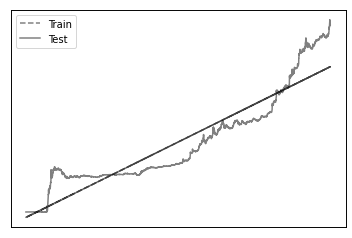

<Figure size 432x288 with 0 Axes>

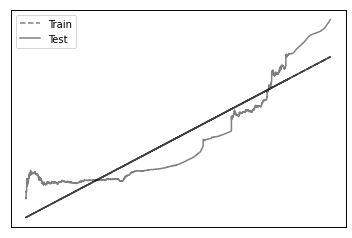


Dolar Blue
----------
Error en Train: 0.26 
Error en Test: 0.26 
Score test: 0.86 
Score train: 0.87 

Prediccion a 3 meses: 85.95
Prediccion a 6 meses: 90.52
Prediccion a 12 meses: 100.23


Dolar Oficial
-------------
Error en Train: 0.23 
Error en Test: 0.23 
Score test: 0.84 
Score train: 0.83 

Prediccion a 3 meses: 58.18
Prediccion a 6 meses: 60.95
Prediccion a 12 meses: 66.78



<Figure size 432x288 with 0 Axes>

In [130]:
from src.regression import regression


# Regresion sobre el dolar blue
out_reg_blue: str = regression(
    data.usd, 3, verbose=True, plot=True
)
out_reg_blue += "\n" + regression(data.usd, 6)
out_reg_blue += "\n" + regression(data.usd, 12)
plt.clf()

# Regresion sobre el dolar oficial
out_reg_of: str = regression(
    data.usd_of, 3, verbose=True, plot=True
)
out_reg_of += "\n" + regression(data.usd_of, 6)
out_reg_of += "\n" + regression(data.usd_of, 12)
plt.clf()


print(f"""
Dolar Blue
----------
{out_reg_blue}


Dolar Oficial
-------------
{out_reg_of}
""")


**Vemos que estos valores estan bastante Optimistas a pesar de que el dolar sube a pasos bestiales**

Esto se debe a que el precio del dolar cada ves que se hace mas alto, menos le cuesta variar o aumentar\
(no es lo mismo 20 pesos de subida en un dolar que vale 40. (50%), que 20 pesos de subida en un dolar que vale 200. (10%))\
Se va tornando exponencial, por eso use [logaritmo natural](https://github.com/hackcheek/API_BCRA/blob/2aaf24edd0c0295088379e9c6fd47e822ca97dc6/src/regression.py#L52)\
Y Tambien ese es el motivo por el cual una regresion lineal arroja un mal resultado

### h) Mejor momento para comprar dolár oficial y venderlo a dolár blue
\
Como vimos en el punto e, nos conviene comprar al oficial y vender al blue en un gobierno peronista.
Para ser mas claros, cuando existe una expansion de la brecha entre los tipos de cambio. Grafiquemos!

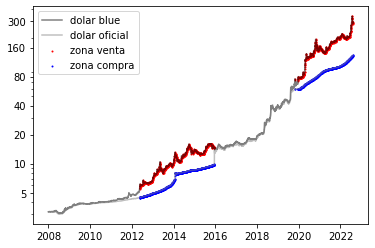

In [210]:
import matplotlib
import numpy as np

usd_h = data.usd.copy()[data.usd.date.dt.year > 2007]
usdof_h = data.usd_of.copy()[data.usd_of.date.dt.year > 2007]

var_h = data.var_usd_vs_usd_of.copy()[data.var_usd_vs_usd_of.date.dt.year > 2007]

var_price = (
    pd.merge(
        pd.merge(usd_h, usdof_h, on='date'), var_h, on='date'
    )
).rename(columns={'v_x': 'blue', 'v_y': 'oficial', 'v': 'brecha'})

price_result = var_price[var_price.brecha > 20]


#plt.plot(var_h.date, var_h.v)
 
_, ax = plt.subplots()

ax.plot(var_price.date, var_price.blue, color='black', alpha=0.5)
ax.plot(var_price.date, var_price.oficial, color='grey', alpha=0.5)
ax.scatter(price_result.date, price_result.blue, s=1, color='red')
ax.scatter(price_result.date, price_result.oficial, s=1, color='blue')

ax.set_yscale('log')
ax.set_yticks([5, 10, 20, 40, 80, 160, 300])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(['dolar blue', 'dolar oficial', 'zona venta', 'zona compra'])
plt.savefig('../plots/compra_venta.png')


**Estos son buenos precios de compra (azul) y venta (rojo)**\
Las zonas fueron determinadas por la brecha, este sistema toma como validas opciones de compra y venta cuando la variacion entre los activos supera el 20%

### Author:  [Nicolas Palermo](https://github.com/hackcheek/API_BCRA)

### Nota: Deje el ejercicio opcional sin resolver. Pienso hacerlo con un modelo de deep learning